# BOOTCAMP ALURA - ANÁLISE DE DADOS DA SAÚDE

## Sobre o projeto

Data Science Aplicada é um bootcamp promovido pela Alura que consiste em analisar dados da saúde pública brasileira.
O bootcamp está organizado em módulos com duração de 12 semanas

***

Este notebook possui as análises do módulo 3

**Análise descritiva e testes estatísticos**

***

## Dataset Utilizado

O dataset utilizado neste módulo está disponível no site do IBGE.

**Arquivo:** PeNSE_2015_AMOSTRA2

Disponível em: <a href="https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/"> IBGE</a>

## Módulo 3

### IMPORTAÇÃO DAS BIBLIOTECAS

In [49]:
import pandas           as pd
import numpy            as np
import seaborn          as sns

from zipfile            import ZipFile

from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest

from scipy.stats import normaltest

from scipy.stats import ranksums

### Libs Import

In [2]:
caminho = 'PeNSE_2015_AMOSTRA2.zip'
zip = ZipFile(caminho)

caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ';', decimal = ',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


In [3]:
# Visualizando os dados na pasta zipada
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [4]:
# Visualizando os dados na pasta zipada II
zip.namelist()[1]

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [6]:
dados.select_dtypes(include='object')

""
0
1
2
3
4
...
16551
16552
16553
16554


In [7]:
# sexo dos alunos
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [8]:
# sexo dos alunos - percentual
dados['VB01001'].value_counts(normalize=True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [9]:
# satisfacao do aluno em relacao ao seu corpo
frequencia = dados['VB11007'].value_counts()

In [10]:
# satisfacao do aluno em relacao ao seu corpo - percentual
percent = dados['VB11007'].value_counts(normalize = True) * 100

In [11]:
# trasnformando em um dataframe

respostas = {
    1 : 'muito satisfeito',
    2 : 'satisfeito',
    3 : 'indiferente',
    4 : 'insatisfeito',
    5 : 'muito insatisfeito',
    99 : 'nao informado'
}

# criando um dataframe
dist_freq = pd.DataFrame({'frequencia' : frequencia, 'porcentagem' : percent})

#renomeando as colunas
dist_freq.rename(index = respostas, inplace = True)

#renomeando o index
dist_freq.rename_axis('Sentimento x corpo', axis = 1, inplace = True)

#Visualizando o df
dist_freq

Sentimento x corpo,frequencia,porcentagem
satisfeito,6920,41.797536
muito satisfeito,4608,27.832810
insatisfeito,2326,14.049287
indiferente,1807,10.914472
muito insatisfeito,714,4.312636
nao informado,181,1.093259


In [12]:
# calculando IMC
dados['IMC'] = dados['VB17003'] / ((dados['VB17004']/100) ** 2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [13]:
classes = [0, 18.5, 25, 30, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade']

dados['CLASSE_IMC'] = pd.cut(x = dados['IMC'], bins = classes, labels = labels, include_lowest = True)

dados[['IMC', 'CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [14]:
# criando a tabela de frequencias

frequencia = dados['CLASSE_IMC'].value_counts()
percentual = dados['CLASSE_IMC'].value_counts(normalize = True) * 100

dist_freq = pd.DataFrame({'Frequencia' : frequencia, 'Percentual' : percentual})
dist_freq


,Frequencia,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


In [15]:
## Sturges

tamanho_amostra = len(dados)

k = int((1 + ((10/3) * np.log10(tamanho_amostra))))
k

15

In [16]:
dados['CLASSE_ALTURA'] = pd.cut(x = dados['VB17004'], bins = k, include_lowest = True)

In [17]:
# Criando a tabela de frequencia

frequencia = dados['CLASSE_ALTURA'].value_counts()
percentual = dados['CLASSE_ALTURA'].value_counts(normalize = True) * 100

dist_freq = pd.DataFrame({'Frequencia' : frequencia, 'Percentual' : percentual})
dist_freq

,Frequencia,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [18]:
# criando a tabela de frequencia cruzada
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize = True)

#renomeando as colunas
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1 : 'Masculino', 2 : 'Feminino'}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
muito satisfeito,0.161996,0.116332
satisfeito,0.210800,0.207176
indiferente,0.057381,0.051764
insatisfeito,0.047475,0.093018
muito insatisfeito,0.015704,0.027422
nao informado,0.007188,0.003745


In [19]:
# criando a tabela de frequencia cruzada
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize = 'columns') * 100 # Normalização em relação a coluna

#renomeando as colunas
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1 : 'Masculino', 2 : 'Feminino'}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
muito satisfeito,32.363944,23.291813
satisfeito,42.114155,41.480227
indiferente,11.463738,10.364010
insatisfeito,9.484735,18.623776
muito insatisfeito,3.137444,5.490386
nao informado,1.435984,0.749788


In [20]:
## AGG FUNC

## HISTOGRAMA E BOXPLOT

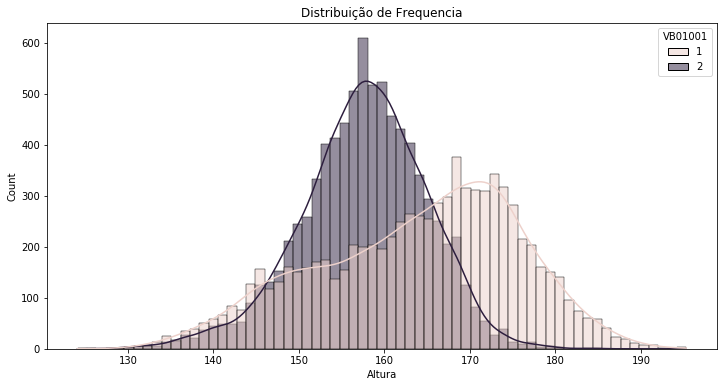

In [21]:
ax = sns.histplot(x = dados['VB17004'], data = dados, hue = 'VB01001', kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequencia')
ax.set_xlabel('Altura')
ax;

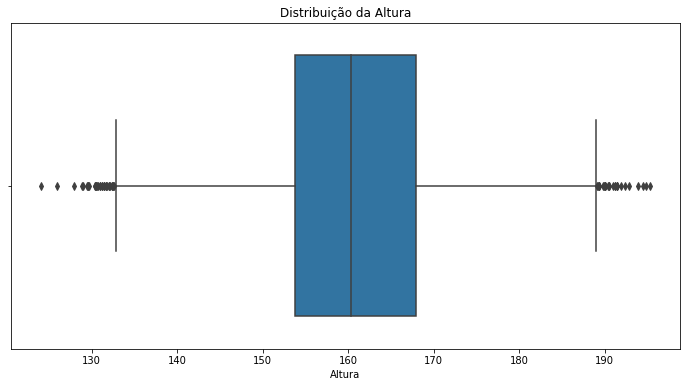

In [22]:
ax = sns.boxplot(x = dados['VB17004'], data = dados, hue = 'VB01001')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da Altura')
ax.set_xlabel('Altura')
ax;

In [23]:
# visualizando o primeiro quartil
dados['VB17004'].quantile(0.25)

153.8

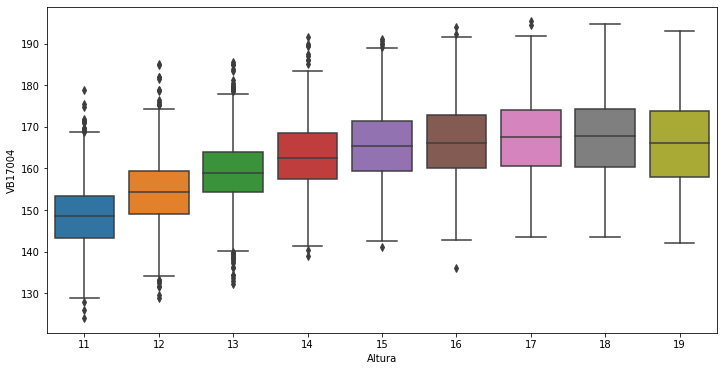

In [24]:
ax = sns.boxplot(y = 'VB17004', x ='VB01003', data = dados)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Altura')
ax;

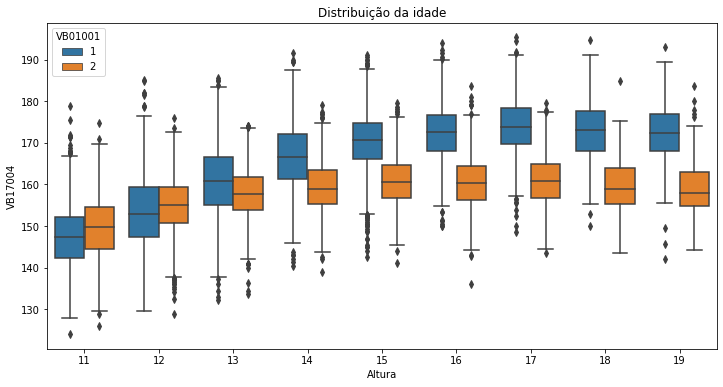

In [25]:
ax = sns.boxplot(y = 'VB17004', x ='VB01003', hue = 'VB01001', data = dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da idade')
ax.set_xlabel('Altura')
ax;

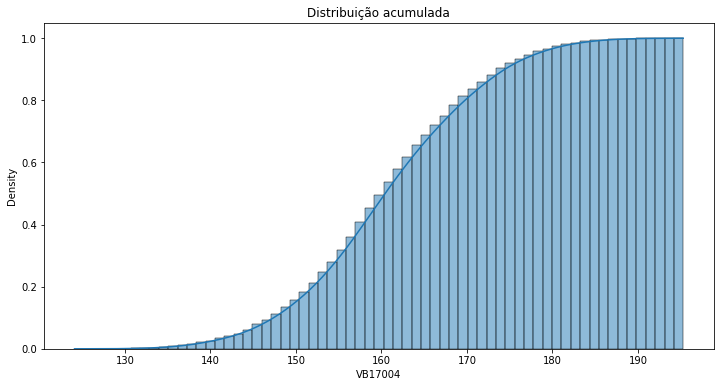

In [26]:
ax = sns.histplot(x = 'VB17004', data = dados, 
                 kde = True,
                 cumulative = True,
                 stat = 'density')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição acumulada')
ax;

In [27]:
## Cálculo do boxplot

In [28]:
##media das alturas
dados['VB17004'].mean()

160.71311307078818

In [29]:
dados.groupby('VB01001')['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [30]:
dados.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [31]:
## desvio medio absoluto

In [33]:
# Intervalo de confiança

zconfint(dados['VB17004'].tolist())

(160.5556082427712, 160.87061789880892)

In [39]:
descricao_altura = DescrStatsW(dados['VB17004'])
descricao_altura.zconfint_mean()

(160.55560824277106, 160.87061789880877)

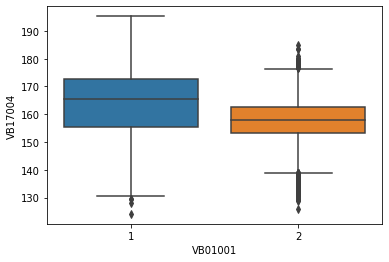

In [40]:
sns.boxplot(data = dados, x = 'VB01001', y = 'VB17004')

In [42]:

distribuicao_altura_m = dados.query('VB01001 == 1')['VB17004']
distribuicao_altura_f = dados.query('VB01001 == 2')['VB17004']

ztest(distribuicao_altura_m, distribuicao_altura_f)

(41.16851708819389, 0.0)

In [45]:
# p_value

_ , p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)
p_value

0.0

In [47]:
# Garantir que a curva é normal

normaltest(distribuicao_altura_m)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

In [48]:
_ , pvalue_normaltest_m = normaltest(distribuicao_altura_m)
_ , pvalue_normaltest_f = normaltest(distribuicao_altura_f)

print(pvalue_normaltest_m, pvalue_normaltest_f)

7.695118853996524e-75 7.125189471020874e-47


In [51]:
## ranksums

ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)